In [18]:
import networkx as nx #библиотека для работы с графами
import matplotlib.pyplot as plt #библиотека для визуализации
import networkx.algorithms.approximation as app #библиотека алгоритмов
import haversine #для поиска расстояний




G_ = nx.Graph()
# сисок стран. первая в списке в каждом внутренннем списке - страна с которой граничат все остальные

country_list=[
    ["Armenia", "Turkey", "Georgia"],
    ["Albania", "Kosovo", "Montenegro","Greece", "North Macedonia"],
    ["Andorra", "France", "Spain" ],
    ["Austria", "Czech Republic" , "Germany" , "Slovakia" , "Hungary" , "Slovenia", "Italy" , "Switzerland" , "Liechtenstein" ],
    ["Belarus", "Poland" ,   "Lithuania" ,   "Latvia" ,  "Russia" , "Ukraine" ],
    ["Belgium", "France" ,  "Luxembourg" , "Netherlands" ,  "Germany" ],
    ["Bosnia and Herzegovina", "Croatia" ,   "Serbia" , "Montenegro"],
    ["Bulgaria", "Turkey" ,  "Greece" , "Romania" ,  "Serbia" , "North Macedonia"],
    ["Croatia", "Bosnia and Herzegovina" ,   "Hungary" ,   "Montenegro" , "Serbia" ,   "Slovenia"],
    ["Czech Republic", "Poland" ,  "Germany" ,  "Austria" , "Slovakia"],
    ["Cyprus"],
    ["Denmark", "Germany"],
    ["Estonia", "Latvia" , "Russia"],
    ["Finland", "Sweden" ,   "Russia" ,  "Norway"],
    ["France", "Monaco" ,   "Italy" ,  "Luxembourg" ,  "Germany" ,  "Belgium" ,"Switzerland" ,   "Spain" ,  "Andorra"],
    ["Germany","Denmark" ,"Poland","Netherlands","Luxembourg","Belgium","France" , "Austria" , "Switzerland","Czech Republic"],
    ["Georgia", "Russia" ,  "Turkey" ,   "Armenia"],
    ["Greece", "North Macedonia" ,   "Turkey" ,  "Bulgaria" ,"Albania"],
    ["Hungary", "Slovenia" , "Ukraine" ,  "Austria" , "Croatia" ,"Romania" , "Serbia" , "Slovakia"],
    ["Iceland"],
    ["Ireland", "United Kingdom"],
    ["Italy", "Slovenia" ,   "Vatican City" ,   "Switzerland" ,  "San Marino" , "France"],
    ["Kosovo", "Serbia" ,  "North Macedonia" ,  "Albania" , "Montenegro"],
    ["Latvia", "Estonia" ,  "Russia" ,  "Belarus" , "Lithuania"],
    ["Liechtenstein", "Switzerland" ,  "Austria"],
    ["Lithuania", "Latvia" ,  "Belarus" , "Russia" ,  "Poland"],
    ["Luxembourg", "Belgium" ,   "Germany" , "France"],
    ["Malta"],
    ["Moldova", "Ukraine" , "Romania"],
    ["Monaco", "France"],
    ["Montenegro", "Kosovo" ,  "Albania" ,  "Serbia" ,  "Bosnia and Herzegovina" ,   "Croatia"],
    ["Netherlands", "Germany" ,  "Belgium"],
    ["North Macedonia", "Albania" ,  "Greece" ,   "Bulgaria" ,   "Serbia" , "Kosovo"],
    ["Norway", "Sweden" ,   "Russia" , "Finland"],
    ["Poland", "Ukraine" ,  "Slovakia" , "Lithuania" , "Russia" ,"Germany" ,  "Czech Republic" ,   "Belarus"],
    ["Romania", "Ukraine" ,   "Serbia" ,   "Moldova" ,  "Hungary" , "Bulgaria"],
    ["Russia", "Belarus" ,"Estonia" , "Finland" , "Georgia" , "Latvia" ,  "Lithuania" , "Norway" , "Poland" ,   "Ukraine"],
    ["San Marino", "Italy"],
    ["Serbia", "Hungary" , "Romania","Bulgaria", "North Macedonia" , "Kosovo" ,  "Croatia" , "Bosnia and Herzegovina" ,"Montenegro"],
    ["Slovakia", "Czech Republic" , "Poland" ,"Ukraine" ,"Hungary" , "Austria"],
    ["Slovenia", "Austria" , "Croatia" ,  "Hungary" , "Italy"],
    ["Spain", "Andorra" , "France" ,   "Portugal"],
    ["Sweden", "Finland" ,   "Norway"],
    ["Switzerland", "Italy" ,   "France" ,"Germany" ,"Austria" ,"Liechtenstein"],
    ["Turkey", "Armenia" ,   "Georgia" , "Bulgaria" , "Greece"],
    ["Ukraine", "Moldova" ,  "Belarus" ,  "Russia" ,  "Romania" , "Hungary" ,  "Slovakia" ,  "Poland"],
    ["United Kingdom", "Ireland"],
    ["Vatican City", "Italy"]
]

c_all=range(len(country_list))#кол-во стран
#формируем граф по первым странам
for counter_country in c_all:
    G_.add_node(country_list[counter_country][0])#страна КОТОРАЯ граничит - первая в списке, добавляем к графу

for counter_country in c_all:#формируем пары граничащих стран
    s0=country_list[counter_country][0]

    for counter_rel in range(1,len(country_list[counter_country])):
        G_.add_edge(s0, country_list[counter_country][counter_rel]) #добавляем связи - страны после первой в списке






a) Draw3 G_ with the minimum number of intersecting edges

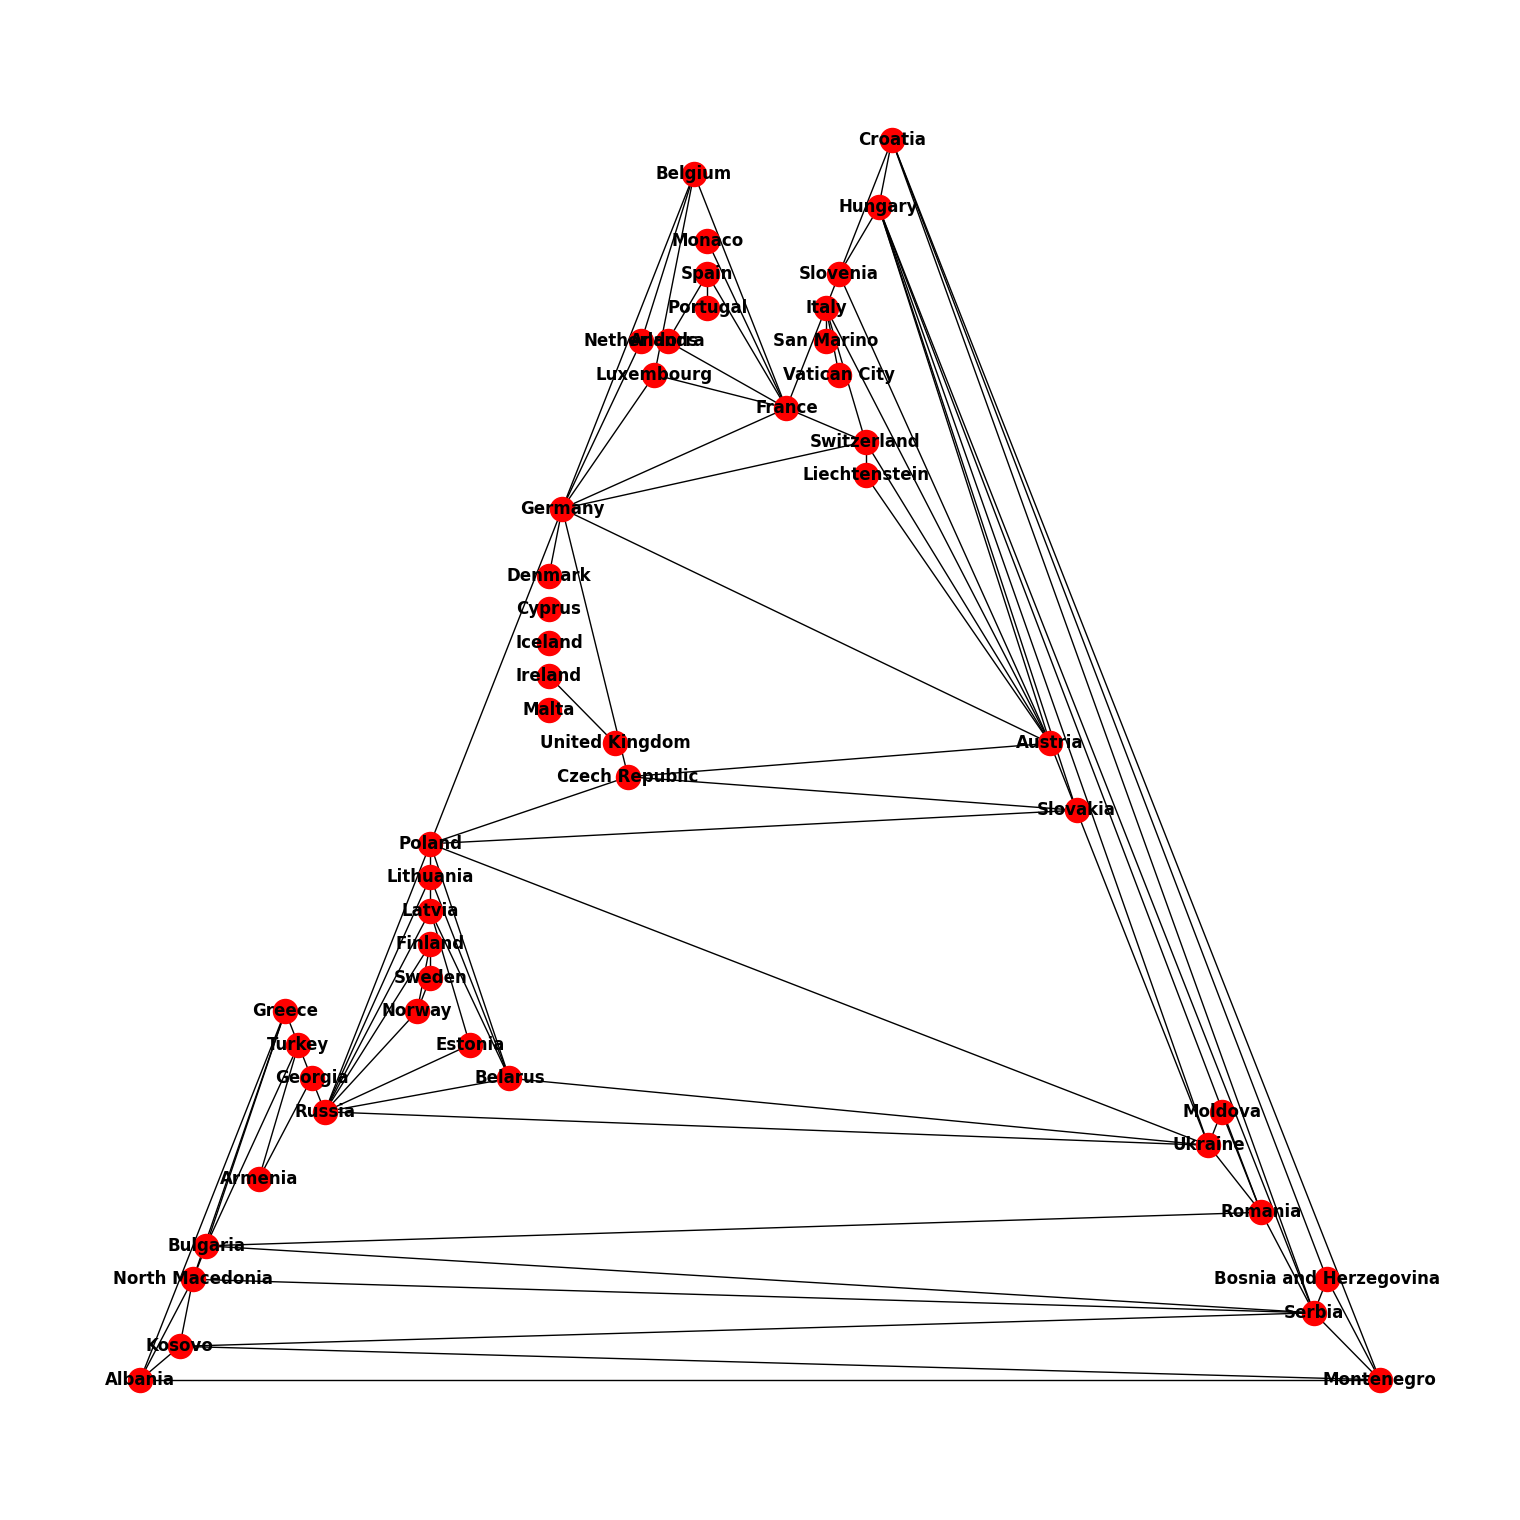

In [19]:
#рисуем граф без пересечений ребер с помощью nx.draw_planar
plt.figure(figsize=(15, 15)) #Width(15), height(15) - поле отрисовки гор и верт
nx.draw_planar(G_, node_color="r", with_labels=True, node_size=300, font_weight='bold')

b) Find |V |, |E|, δ (G), Δ(G), rad(G), diam(G), girth(G), center(G), κ(G), λ(G).

In [20]:
G = G_.subgraph(max(nx.connected_components(G_), key=len)) #G - the largest connected component of G_, nx.connected_components(G_) генерирует узлы компоненты связности, из таких компонент выбираем the largest
print("|V| = ", G.number_of_nodes())
print("|E| = ", G.number_of_edges())

max_degree = 0
min_degree = 60
for node, deg in G.degree: #G.degree - словарь (node, its degree)
    min_degree = min(min_degree, deg)
    max_degree = max(max_degree, deg)
print("min degree = ", min_degree)
print("max degree = ", max_degree)

print("radius = ", nx.radius(G))
print("diametr = ", nx.diameter(G))
print("girth = ", min([len(cycle) for cycle in nx.cycle_basis(G)])) #nx.cycle_basis(G) возвращает список циклов
print("center:  ", nx.center(G))
print()
print("vertex connectivity:  (", nx.node_connectivity(G), ")   ", nx.minimum_node_cut(G)) #nx.minimum_node_cut(G) returns a minimum set of nodes  that disconnects G
print()
print("edge connectivity:  (", nx.edge_connectivity(G), ")   ", nx.minimum_edge_cut(G))


|V| =  44
|E| =  91
min degree =  1
max degree =  9
radius =  5
diametr =  8
girth =  3
center:   ['Austria', 'Belarus', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Lithuania', 'Poland', 'Russia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']

vertex connectivity:  ( 1 )    {'Spain'}

edge connectivity:  ( 1 )    {('Denmark', 'Germany')}


c) Find the minimum vertex coloring Z : V → N of G.

min number of colors is  4


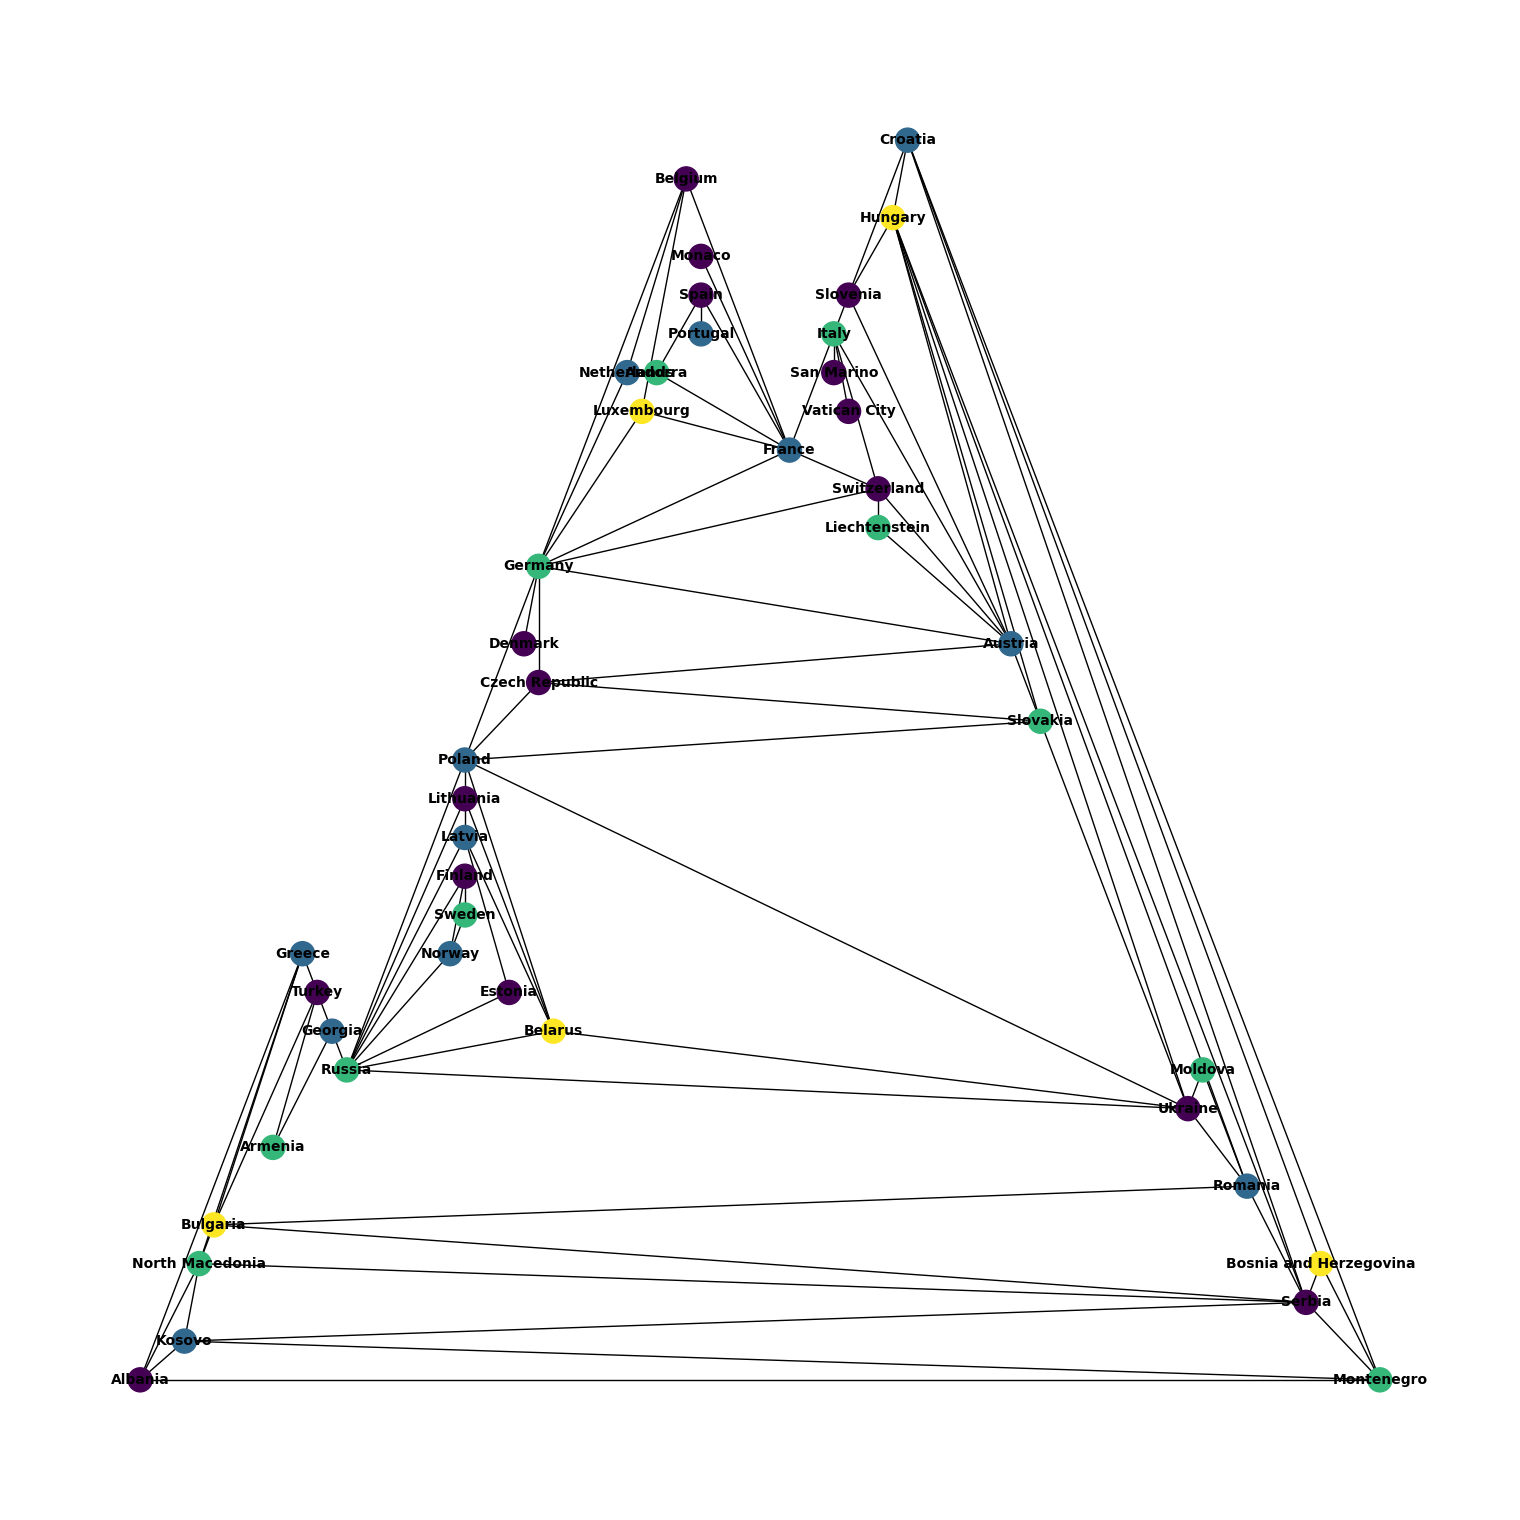

In [21]:
#Если найти наибольшую клику в G (app.max_clique(G)), то ее размер равен 4. А как известно, количество цветов для раскраски полного графа равно кол-ву его вершин. То есть нужно как минимум 4 цвета, чтобы раскрасить найденную клику, а значит и не меньше 4 цветов для всего графа. Ниже предоставлена раскраска для 4 цветов

dict_node_color = nx.coloring.greedy_color(G, strategy="smallest_last") #return pairs = <node, color>; smallest_last - минимальное кол-во цветов

color_map = []
for node in G:
    color_map.append(dict_node_color[node])

print("min number of colors is ", max(dict_node_color.values()) + 1) # +1 так как индексы цветов начинаются с 0
plt.figure(figsize=(15, 15))
nx.draw_planar(G, node_color=color_map, with_labels=True, node_size=300, font_size = 10, font_weight='bold')


d) Find the minimum edge coloring X : E → N of G.

min number of colors is  9


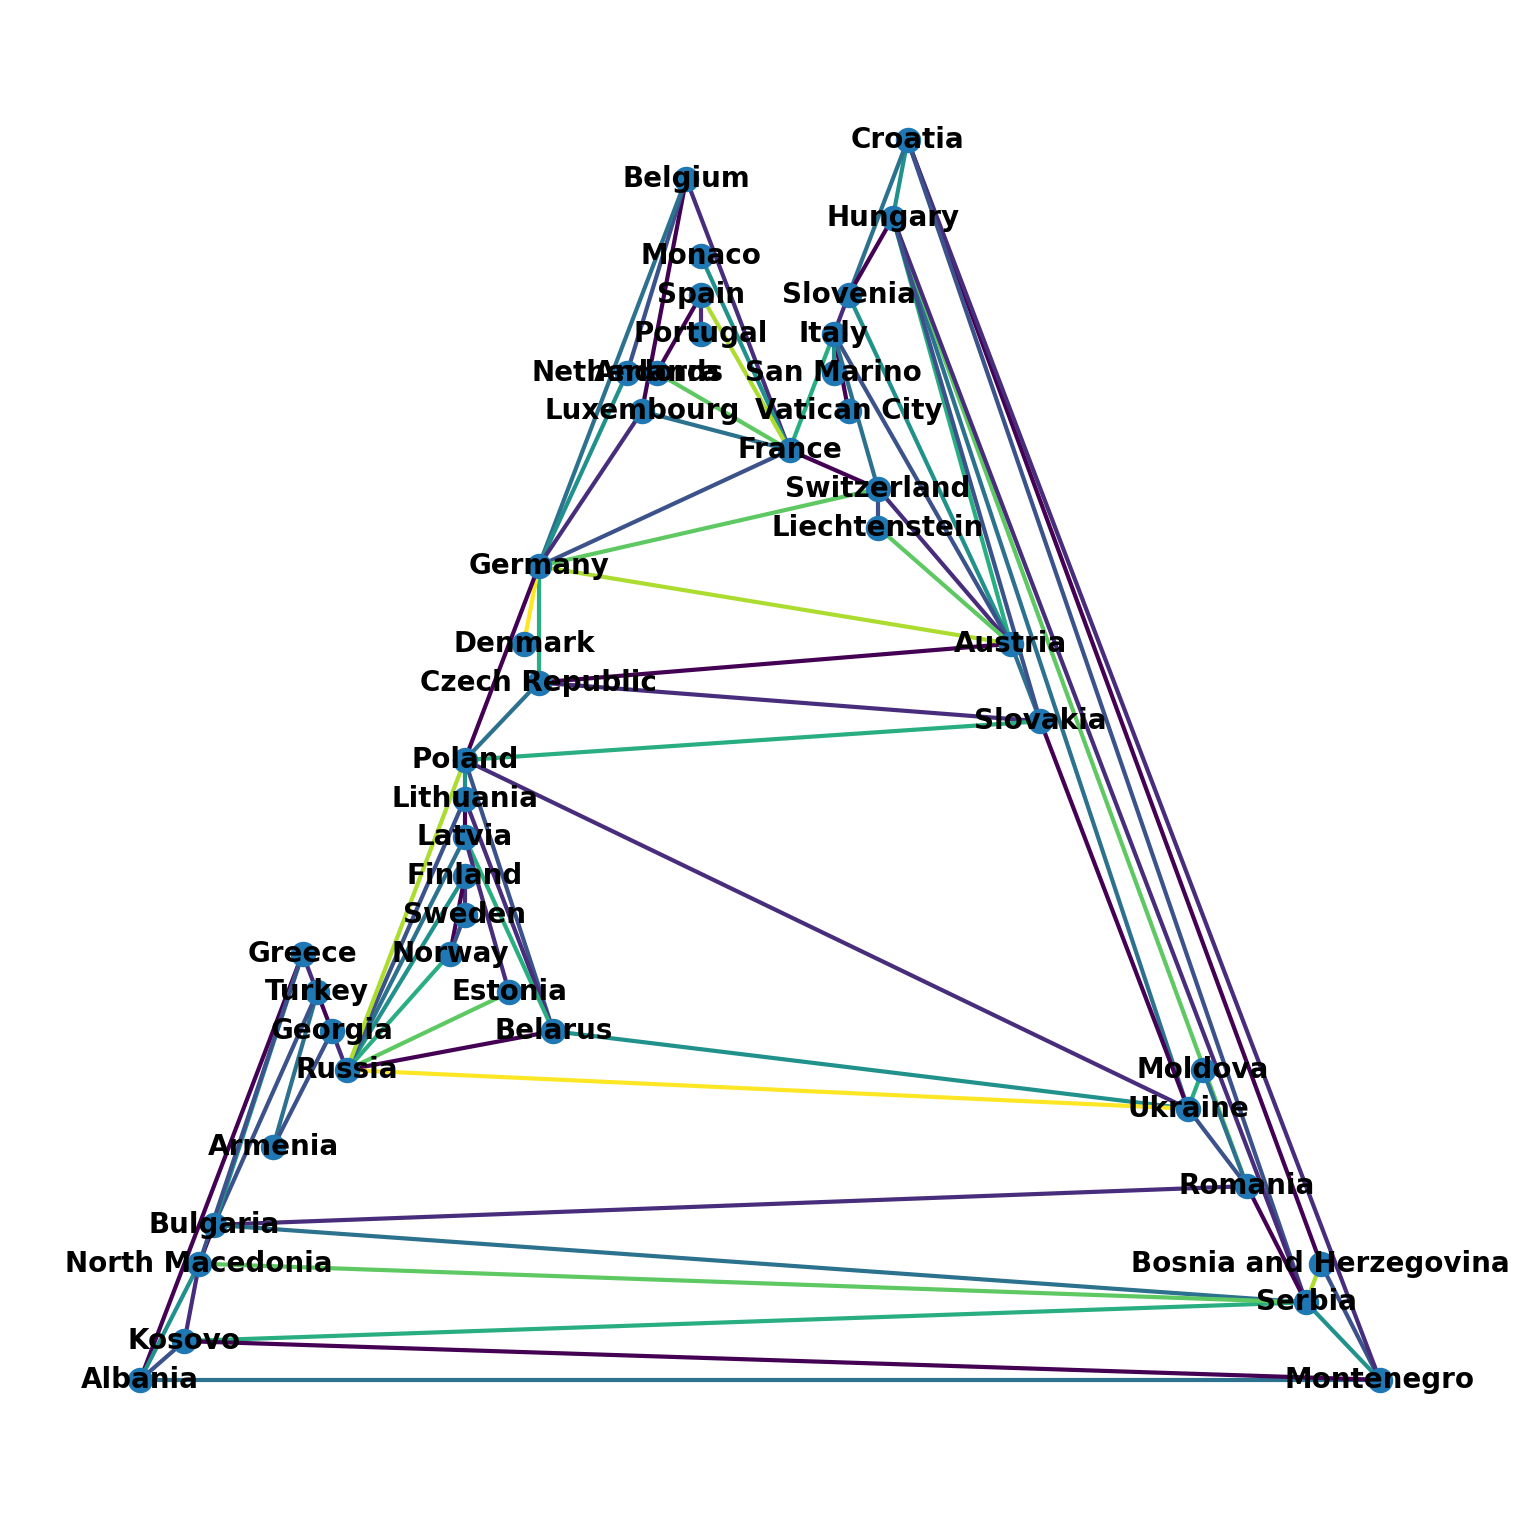

In [22]:
#Аналогично с предыдущим пунктом, найдем наибольшую клику EG (app.max_clique(EG)). Ее размер равен 9. То есть кол-во цветов для всего графа >=9.

EG = nx.line_graph(G); #EG - реберный граф для G(ребра G - вершины EG, вершины EG смежны, если соответственные ребра G инцидентны
dict_edge_color = nx.coloring.greedy_color(EG, strategy="smallest_last") # return pairs = <edge, color>


print("min number of colors is ", max(dict_edge_color.values()) + 1) # +1 так как индексы цветов начинаются с 0

color_map_1 = []
for edge in G.edges():
    color_map_1.append(dict_edge_color[edge])


plt.figure(figsize=(15, 15))
nx.draw_planar(G,  edge_color = color_map_1, with_labels=True, node_size=300, font_size = 20, font_weight='bold', width = 3)

e) Find the maximum clique Q ⊆ V of G.

{'Belarus', 'Lithuania', 'Poland', 'Russia'}


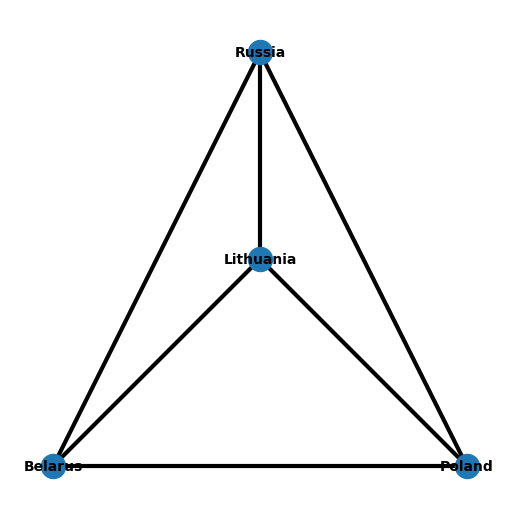

In [23]:
# Алгоритм поиска наибольшей клики
# 1) случайно выбираем узел и добавляем его в нашу изначально пустую клику, для него ищем кондидатов для добавления в его клику, для этого
# 2) просматриваем каждый из остальных узлов, если он соединен с нашим узлом (если клика состоит уже не только из одного узла, то нужно, чтобы он был соединен со всеми узлами клики), то добавляем его в список кандидатов
# 3) из кандидатов выбираем лучшего: того у кого больше связей, т.к он даст наибольший из возможных список кандидатов на следующей итерации алгоритма, добавляем его в клику
# 4) если в какой-то момент нет кандидатов, то выкидываем один лучший узел надеясь ,что можно добавить новый другой узел и это позволит продвинуться дальше

# Алгоритм повторяет пункты 1) - 4), но если после n-ого кол-ва итераций продвиженй нет, то алгоритм выбирает новый случайный узел и запускается от него

plt.figure(figsize=(5, 5))
nx.draw_planar(G.subgraph(app.max_clique(G)), with_labels=True, node_size=300, font_size = 10, font_weight='bold', width = 3)
print(app.max_clique(G))

f) Find the maximum stable set S ⊆ V of G.

In [24]:
invert_edge_arr = []

for country1 in G:#формируем пары неграничащих стран
    for country2 in G:
        if  (country1, country2) not in G.edges() and country1!=country2:
            invert_edge_arr.append((country1, country2))


invert_G = nx.Graph()
invert_G.add_nodes_from(G)
invert_G.add_edges_from(invert_edge_arr)

print("maximum stable set   (", len(app.max_clique(invert_G)), ")   :", app.max_clique(invert_G))
print()

maximum stable set   ( 16 )   : {'Denmark', 'Austria', 'Bosnia and Herzegovina', 'Finland', 'Andorra', 'Armenia', 'Estonia', 'Belarus', 'Monaco', 'Vatican City', 'Moldova', 'Belgium', 'Albania', 'San Marino', 'Bulgaria', 'Portugal'}



g) Find the maximum matching M ⊆ E of G.

In [25]:
print("maximum matching: ", len(nx.max_weight_matching(G, 1)), ":", nx.max_weight_matching(G, 1)) #weight = 1, т.к. G невзвешенный

maximum matching:  20 : {('North Macedonia', 'Albania'), ('Estonia', 'Latvia'), ('Netherlands', 'Belgium'), ('Russia', 'Norway'), ('Poland', 'Lithuania'), ('Slovakia', 'Czech Republic'), ('Monaco', 'France'), ('Turkey', 'Armenia'), ('Ukraine', 'Belarus'), ('Portugal', 'Spain'), ('Vatican City', 'Italy'), ('Romania', 'Moldova'), ('Bulgaria', 'Greece'), ('Germany', 'Luxembourg'), ('Montenegro', 'Kosovo'), ('Austria', 'Hungary'), ('Slovenia', 'Croatia'), ('Switzerland', 'Liechtenstein'), ('Serbia', 'Bosnia and Herzegovina'), ('Sweden', 'Finland')}


h) Find the minimum vertex cover R ⊆ V of G.

In [26]:
print("minimum vertex cover: ", len(app.min_weighted_vertex_cover(G)), ":", app.min_weighted_vertex_cover(G)) #default weight = 1, т.к. G невзвешенный

minimum vertex cover:  32 : {'Denmark', 'Austria', 'Kosovo', 'Turkey', 'Hungary', 'Latvia', 'Slovenia', 'Liechtenstein', 'Greece', 'Andorra', 'Armenia', 'Croatia', 'Ukraine', 'Poland', 'Germany', 'Russia', 'Sweden', 'Montenegro', 'Serbia', 'Bulgaria', 'Spain', 'Bosnia and Herzegovina', 'Finland', 'Georgia', 'Italy', 'France', 'Estonia', 'Belarus', 'Moldova', 'Belgium', 'Czech Republic', 'Albania'}


i) Find the minimum edge cover F ⊆ E of G.

In [27]:
print("minimum edge cover: ", len(nx.min_edge_cover(G)), ":", nx.min_edge_cover(G))

minimum edge cover:  24 : {('North Macedonia', 'Albania'), ('Estonia', 'Latvia'), ('Armenia', 'Georgia'), ('Germany', 'Denmark'), ('Netherlands', 'Belgium'), ('Russia', 'Norway'), ('Poland', 'Lithuania'), ('Slovakia', 'Czech Republic'), ('Monaco', 'France'), ('Turkey', 'Armenia'), ('Italy', 'San Marino'), ('Ukraine', 'Belarus'), ('Portugal', 'Spain'), ('Vatican City', 'Italy'), ('Romania', 'Moldova'), ('Bulgaria', 'Greece'), ('Germany', 'Luxembourg'), ('Montenegro', 'Kosovo'), ('Austria', 'Hungary'), ('Slovenia', 'Croatia'), ('France', 'Andorra'), ('Switzerland', 'Liechtenstein'), ('Serbia', 'Bosnia and Herzegovina'), ('Sweden', 'Finland')}


j) Find the shortest closed walk W that visits every vertex of G.

In [28]:

print("shortest closed walk W that visits every vertex of G: ", len(nx.approximation.traveling_salesman_problem(G)), nx.approximation.traveling_salesman_problem(G)) #задача комивояжера

shortest closed walk W that visits every vertex of G:  60 ['Armenia', 'Turkey', 'Bulgaria', 'Romania', 'Moldova', 'Ukraine', 'Belarus', 'Lithuania', 'Russia', 'Finland', 'Sweden', 'Norway', 'Russia', 'Estonia', 'Latvia', 'Belarus', 'Poland', 'Czech Republic', 'Austria', 'Switzerland', 'Liechtenstein', 'Austria', 'Slovenia', 'Italy', 'San Marino', 'Italy', 'Vatican City', 'Italy', 'Austria', 'Slovakia', 'Austria', 'Germany', 'Denmark', 'Germany', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Spain', 'Portugal', 'Spain', 'Andorra', 'France', 'Monaco', 'France', 'Italy', 'Austria', 'Hungary', 'Croatia', 'Bosnia and Herzegovina', 'Serbia', 'Montenegro', 'Albania', 'North Macedonia', 'Kosovo', 'Albania', 'Greece', 'Turkey', 'Georgia', 'Armenia']


k) Find the shortest closed walk U that visits every edge of G.

In [29]:
print("shortest closed walk U that visits every edge of G: ", len(nx.approximation.traveling_salesman_problem(nx.line_graph(G))), nx.approximation.traveling_salesman_problem(nx.line_graph(G)))

shortest closed walk U that visits every edge of G:  105 [('Denmark', 'Germany'), ('Belgium', 'Germany'), ('Belgium', 'Luxembourg'), ('France', 'Luxembourg'), ('France', 'Monaco'), ('France', 'Spain'), ('Spain', 'Portugal'), ('Andorra', 'Spain'), ('Andorra', 'France'), ('France', 'Switzerland'), ('Belgium', 'France'), ('Belgium', 'Netherlands'), ('Germany', 'Netherlands'), ('Germany', 'Luxembourg'), ('Austria', 'Germany'), ('Czech Republic', 'Germany'), ('Germany', 'Poland'), ('Lithuania', 'Poland'), ('Belarus', 'Lithuania'), ('Belarus', 'Poland'), ('Czech Republic', 'Poland'), ('Poland', 'Ukraine'), ('Moldova', 'Ukraine'), ('Hungary', 'Ukraine'), ('Hungary', 'Slovakia'), ('Hungary', 'Slovenia'), ('Austria', 'Slovenia'), ('Croatia', 'Slovenia'), ('Bosnia and Herzegovina', 'Croatia'), ('Bosnia and Herzegovina', 'Serbia'), ('Bosnia and Herzegovina', 'Montenegro'), ('Kosovo', 'Montenegro'), ('Kosovo', 'Serbia'), ('Hungary', 'Serbia'), ('Hungary', 'Ukraine'), ('Belarus', 'Ukraine'), ('Slov

l) Find all biconnected components (blocks) and draw the block-cut tree of G_

{'Norway', 'Sweden', 'Finland', 'Russia'}
{'Spain', 'Portugal'}
{'Andorra', 'France', 'Spain'}
{'Monaco', 'France'}
{'Italy', 'Vatican City'}
{'Italy', 'San Marino'}
{'Denmark', 'Germany'}
{'Austria', 'Kosovo', 'Turkey', 'Hungary', 'Netherlands', 'Latvia', 'Slovenia', 'Romania', 'Greece', 'Liechtenstein', 'Armenia', 'Croatia', 'Ukraine', 'Poland', 'Germany', 'Switzerland', 'Russia', 'Serbia', 'Montenegro', 'Bulgaria', 'Bosnia and Herzegovina', 'Georgia', 'Italy', 'France', 'Lithuania', 'Estonia', 'Belarus', 'Luxembourg', 'Moldova', 'Belgium', 'Czech Republic', 'Albania', 'Slovakia', 'North Macedonia'}
{'Ireland', 'United Kingdom'}


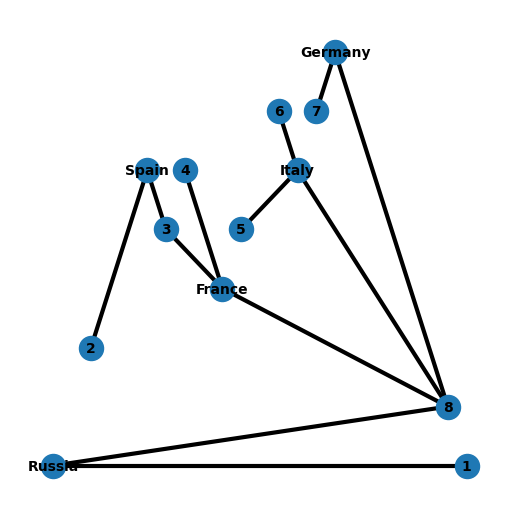

In [30]:
biconnected_comps = list(nx.biconnected_components(G_))
for c in biconnected_comps:
    print(c)

BC_tree = nx.Graph()
for cutpoint in nx.articulation_points(G_):
    BC_tree.add_node(cutpoint)
    for i in range (len(biconnected_comps)):
        if cutpoint in biconnected_comps[i]:
            BC_tree.add_edge(i + 1, cutpoint)

plt.figure(figsize=(5, 5))
nx.draw_planar(BC_tree, with_labels=True, node_size=300, font_size = 10, font_weight='bold', width = 3)

m) Find all 2-edge-connected components of G_

In [31]:
k2_edge_comp = list(nx.k_edge_components(G_, 2))

print(len(k2_edge_comp))
for comp in k2_edge_comp:
    print(comp)

11
{'Austria', 'Kosovo', 'Turkey', 'Hungary', 'Netherlands', 'Latvia', 'Slovenia', 'Norway', 'Romania', 'Greece', 'Liechtenstein', 'Armenia', 'Andorra', 'Croatia', 'Ukraine', 'Poland', 'Germany', 'Switzerland', 'Russia', 'Sweden', 'Serbia', 'Montenegro', 'Bulgaria', 'Spain', 'Bosnia and Herzegovina', 'Finland', 'Georgia', 'Italy', 'France', 'Lithuania', 'Estonia', 'Belarus', 'Luxembourg', 'Moldova', 'Belgium', 'Czech Republic', 'Albania', 'Slovakia', 'North Macedonia'}
{'Cyprus'}
{'Denmark'}
{'Iceland'}
{'Ireland'}
{'Malta'}
{'Monaco'}
{'San Marino'}
{'United Kingdom'}
{'Vatican City'}
{'Portugal'}


n) Add the weight function w : E → R denoting the distance between capitals. Find the minimum
(w.r.t. the total weight of edges) spanning tree T for the largest connected component of the
weighted Europe graph G_

43 44


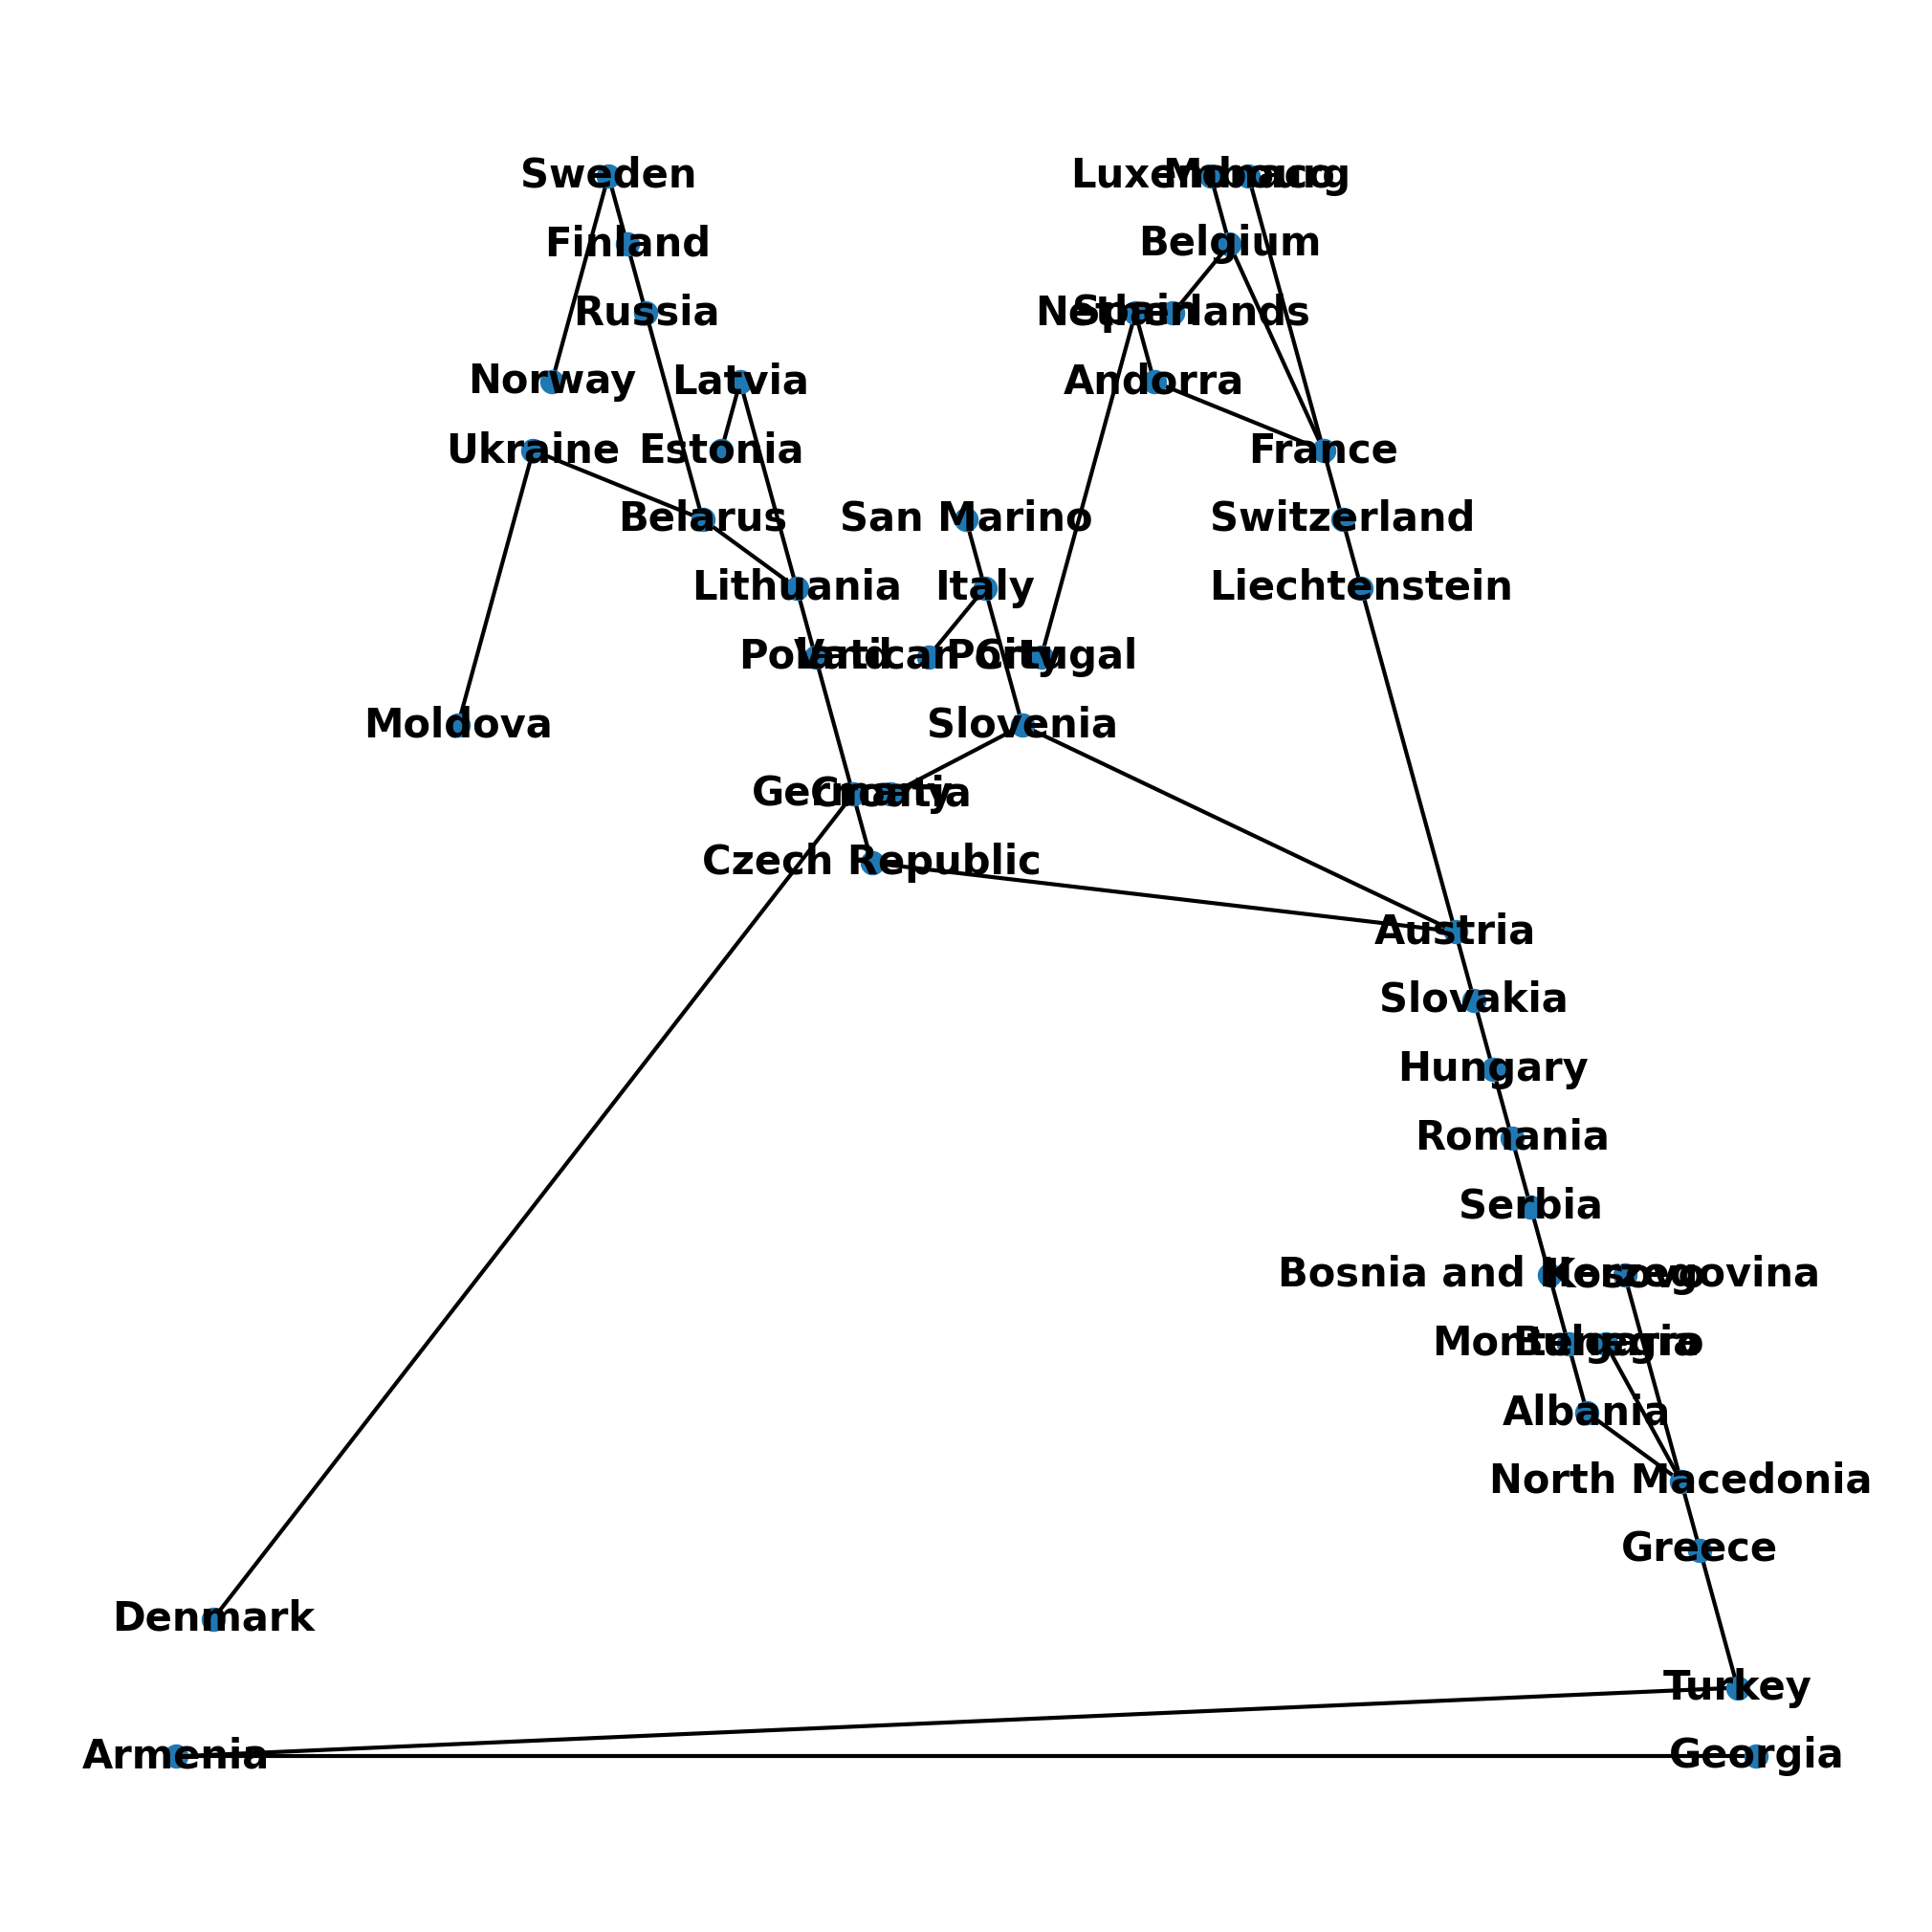

In [32]:
capitals_coord = {"Armenia":{"lat": 40.1804,"long": 44.5145},
                     "Albania":{"lat": 41.3275,"long": 19.8189},
                     "Andorra":{"lat": 42.50779,"long": 1.52109},
                     "Austria":{"lat": 48.20849,"long": 16.37208},
                     "Belarus":{"lat": 53.926452,"long": 27.543578},
                     "Belgium":{"lat": 50.85045,"long": 4.34878},
                     "Bosnia and Herzegovina":{"lat": 43.84864,"long": 18.35644},
                     "Bulgaria":{"lat": 42.69751,"long": 23.32415},
                     "Croatia":{"lat": 45.814440,"long": 15.97798},
                     "Czech Republic":{"lat": 50.088040,"long": 14.42076},
                     "Denmark":{"lat": 55.67594,"long": 12.56553},
                     "Estonia":{"lat": 59.436960,"long": 24.75353},
                     "Finland":{"lat":  60.16952,"long": 24.93545},
                     "France":{"lat": 48.853410,"long": 2.3488},
                     "Germany":{"lat":  52.52437,"long": 13.41053},
                     "Georgia":{"lat": 41.69411,"long": 44.83368},
                     "Greece":{"lat": 37.97945,"long":  23.71622},
                     "Hungary":{"lat": 47.498010,"long": 19.039910},
                     "Iceland":{"lat": 64.135480,"long": -21.89541},
                     "Ireland":{"lat": 53.33306,"long": -6.24889},
                     "Italy":{"lat": 41.90278,"long": 12.49637},
                     "Kosovo":{"lat": 42.67272,"long": 21.16688},
                     "Latvia":{"lat": 57.143620,"long": 24.099277},
                     "Liechtenstein":{"lat": 47.14151,"long": 9.521540},
                     "Lithuania":{"lat": 54.689160,"long": 25.2798},
                     "Luxembourg":{"lat": 49.614967,"long": 6.119980},
                     "Malta":{"lat": 35.89972,"long": 14.51472},
                     "Moldova":{"lat": 47.00556,"long": 28.85750},
                     "Monaco":{"lat": 46.7333300,"long": 8.41667},
                     "Montenegro":{"lat": 42.44111,"long": 19.26361},
                     "Netherlands":{"lat": 52.37403,"long": 4.88969},
                     "North Macedonia":{"lat": 41.99646,"long": 21.431410},
                     "Norway":{"lat": 59.912730,"long": 10.74609},
                     "Poland":{"lat": 52.22977,"long": 21.01178},
                     "Portugal":{"lat": 38.716670,"long": -9.1333300},
                     "Romania":{"lat": 46.43225,"long": 20.10626},
                     "Russia":{"lat": 55.752220,"long": 37.61556},
                     "San Marino":{"lat": 43.93667,"long": 12.44639},
                     "Serbia":{"lat": 44.804010,"long": 20.46513},
                     "Slovakia":{"lat": 48.14816,"long": 17.10674},
                     "Slovenia":{"lat": 46.051080,"long": 14.50513},
                     "Spain":{"lat": 40.433641,"long": -3.734691},
                     "Sweden":{"lat": 59.332580,"long": 18.0649},
                     "Switzerland":{"lat": 46.94809,"long": 7.44744},
                     "Turkey":{"lat": 39.91987,"long": 32.85427},
                     "Ukraine":{"lat": 50.45466,"long": 30.5238},
                     "United Kingdom":{"lat": 51.5085300,"long": -0.12574},
                     "Vatican City":{"lat": 41.9027,"long": 12.4541},
                     }

WG_ = G_.copy()

edges_weight = {}
for edge in WG_.edges():
    edges_weight[edge] = haversine.haversine(
        (capitals_coord[edge[0]]["lat"], capitals_coord[edge[0]]["long"]), (capitals_coord[edge[1]]["lat"], capitals_coord[edge[1]]["long"]))
nx.set_edge_attributes(WG_, edges_weight, "weight")

WG = WG_.subgraph(max(nx.connected_components(WG_), key=len))

# при поиске minimum_spanning_tree я бы использовала алгоритм Прима
T = nx.minimum_spanning_tree(WG)


plt.figure(figsize=(20, 20))
nx.draw_planar(T, with_labels=True, node_size=300, font_size = 30, font_weight='bold', width = 3)
print(len(T.edges()), len(T))

o) Find centroid(T ) (w.r.t. the edge weight function w).

In [33]:
#центроид  - вершина, при удалении которой размеры оставшихся компонент будут не более n/2 (n - число всех вершин дерева)

w = {} #массив размеров поддеревьев для всех вершин

def sizes(v, p):
    w[v] = 1
    for nabour in T[v]:
        if nabour != p: w[v] = w[v] + sizes(nabour, v)
    return w[v]

sizes("Armenia", "")

#for i in w.keys():
    #print(i, w[i])

def find_centroid(v, p):
    for nabour in T[v]:
        if nabour != p and w[nabour] > len(T)/2:
            return find_centroid(nabour, v)
    return v

centroid = find_centroid("Armenia", "")
print("centroid   ", centroid)


centroid    Austria


p) Construct the Prufer code for T .

In [34]:
pruffer_code = nx.to_prufer_sequence(nx.convert_node_labels_to_integers(T)) #convert_node_labels_to_integers inherit node ordering from G.nodes()

arr_of_nodes = []
for node in T.nodes:
    arr_of_nodes.append(node)

for el in pruffer_code:
    print(arr_of_nodes[el])

North Macedonia
Slovenia
Germany
Latvia
Armenia
Turkey
North Macedonia
Lithuania
Belgium
Ukraine
France
Belgium
France
Sweden
Italy
Finland
Russia
Belarus
Greece
North Macedonia
Albania
Montenegro
Bosnia and Herzegovina
Serbia
Romania
Hungary
Slovakia
Austria
Belarus
Lithuania
Poland
Germany
Czech Republic
Austria
Italy
Slovenia
Austria
Liechtenstein
Switzerland
France
Andorra
Spain
